#Bike sharing assignment

Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##Data pre-porcessing
###Understanding Dataset

Loading dataset 'Day.csv'

In [2]:
data = pd.read_csv('/content/drive/MyDrive/day.csv')


In [3]:
data.head

<bound method NDFrame.head of      instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  01-01-2018       1   0     1        0        6           0   
1          2  02-01-2018       1   0     1        0        0           0   
2          3  03-01-2018       1   0     1        0        1           1   
3          4  04-01-2018       1   0     1        0        2           1   
4          5  05-01-2018       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
725      726  27-12-2019       1   1    12        0        4           1   
726      727  28-12-2019       1   1    12        0        5           1   
727      728  29-12-2019       1   1    12        0        6           0   
728      729  30-12-2019       1   1    12        0        0           0   
729      730  31-12-2019       1   1    12        0        1           1   

     weathersit       temp     atemp      hum  windspeed 

In [32]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


##Data Cleaning

In [ ]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

###converting catagorical data into numeric

catagorical variabale season ------> numeric data 

In [ ]:
data.season

0      1
1      1
2      1
3      1
4      1
      ..
725    1
726    1
727    1
728    1
729    1
Name: season, Length: 730, dtype: int64

In [ ]:
data.season.value_counts()


3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [4]:
def season(x):
    if x==1:
        return 'spring'
    elif x==2:
        return 'summer'
    elif x==3:
        return 'fall'
    else:
        return 'winter'
data['season']=data['season'].apply(season)

In [5]:

data.season.value_counts()


fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

catagorical variabale month ------> numeric data 

In [6]:
def month(x):
  return x.map({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul', 8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dec'})

In [7]:
data[['mnth']] = data[['mnth']].apply(month)

In [9]:
data['mnth'].value_counts()

jan    62
mar    62
may    62
jul    62
aug    62
oct    62
dec    62
apr    60
jun    60
sep    60
nov    60
feb    56
Name: mnth, dtype: int64

catagorical variabale weekday ------> numeric data 

In [10]:
data['weekday'].value_counts()

6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64

In [11]:
def weekday(x):
  return x.map({0 : 'sun', 1:'mon', 2:'tue', 3:'wed', 4:'thu', 5:'fri', 6:'sat'})

In [12]:
data[['weekday']] = data[['weekday']].apply(weekday)

In [13]:
data['weekday'].value_counts()

sat    105
sun    105
mon    105
tue    104
thu    104
fri    104
wed    103
Name: weekday, dtype: int64

catagorical variabale weathersit ------> numeric data 

In [14]:
data['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [15]:
def weather(x):
  return x.map ({1:'clear', 2:'mist', 3:'snow', 4:'rainy'})

In [16]:

data[['weathersit']] = data[['weathersit']].apply(weather)


In [17]:
data['weathersit'].value_counts()

clear    463
mist     246
snow      21
Name: weathersit, dtype: int64

We have converted all the needed catagorical data into numeric form.


###Removing redundant & unwanted columns


**instant** : Its only an index value

**dteday** : This has the date, Since we already have seperate columns for 'year' & 'month',
hence, we could live without this column.

**casual** **&** registered : Both these columns contains the count of bike booked by different 
categories of customers. Since our objective is to find the total count of bikes and not
 by specific category, we will ignore these two columns. More over, we have created a new 
 variable to have the ratio of these customer types.

In [20]:
data_new=data[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]

In [21]:
data_new.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


###Creating Dummy Variables

In [22]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


Creating dummy variables for season, weathersit, mnth and  weekday

In [23]:
data_new['season']=data_new['season'].astype('category')
data_new['weathersit']=data_new['weathersit'].astype('category')
data_new['mnth']=data_new['mnth'].astype('category')
data_new['weekday']=data_new['weekday'].astype('category')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [24]:
data_new.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


Now, we will Create Dummy variable
then drop original variable of which the dummy was created
and then drop first dummy variable for each set of dummies created.

In [25]:
data_new = pd.get_dummies(data_new, drop_first=True)
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               730 non-null    int64  
 1   holiday          730 non-null    int64  
 2   workingday       730 non-null    int64  
 3   temp             730 non-null    float64
 4   atemp            730 non-null    float64
 5   hum              730 non-null    float64
 6   windspeed        730 non-null    float64
 7   cnt              730 non-null    int64  
 8   season_spring    730 non-null    uint8  
 9   season_summer    730 non-null    uint8  
 10  season_winter    730 non-null    uint8  
 11  mnth_aug         730 non-null    uint8  
 12  mnth_dec         730 non-null    uint8  
 13  mnth_feb         730 non-null    uint8  
 14  mnth_jan         730 non-null    uint8  
 15  mnth_jul         730 non-null    uint8  
 16  mnth_jun         730 non-null    uint8  
 17  mnth_mar        

We have created dummy variuables for needed predictor variables. 

##Spliting the data

We will split our dataset into train and test part in the 7:3 ratio.|

In [26]:
data_new.shape

(730, 30)

In [27]:
np.random.seed(0)
data_train, data_test = train_test_split(data_new, train_size = 0.70, test_size = 0.30, random_state = 300)

In [28]:
data_train.shape

(510, 30)

In [29]:
data_test.shape

(219, 30)

##Data Visualisation

In [30]:
data_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_mist', 'weathersit_snow'],
      dtype='object')

###we will use temp, atemp ,hum and cnt for displot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


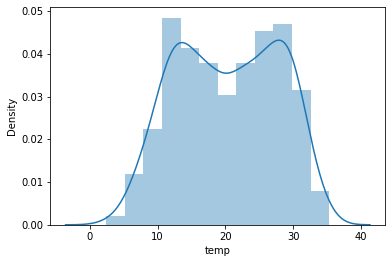

In [31]:
sns.distplot(data_new['temp'])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


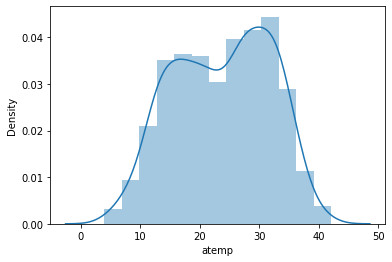

In [58]:
sns.distplot(data_new['atemp'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


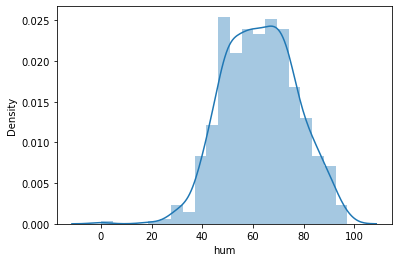

In [ ]:
sns.distplot(data_new['hum'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


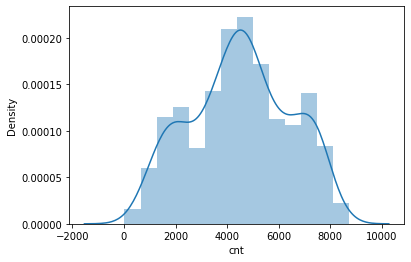

In [ ]:
sns.distplot(data_new['cnt'])

###visualizing categorical variables

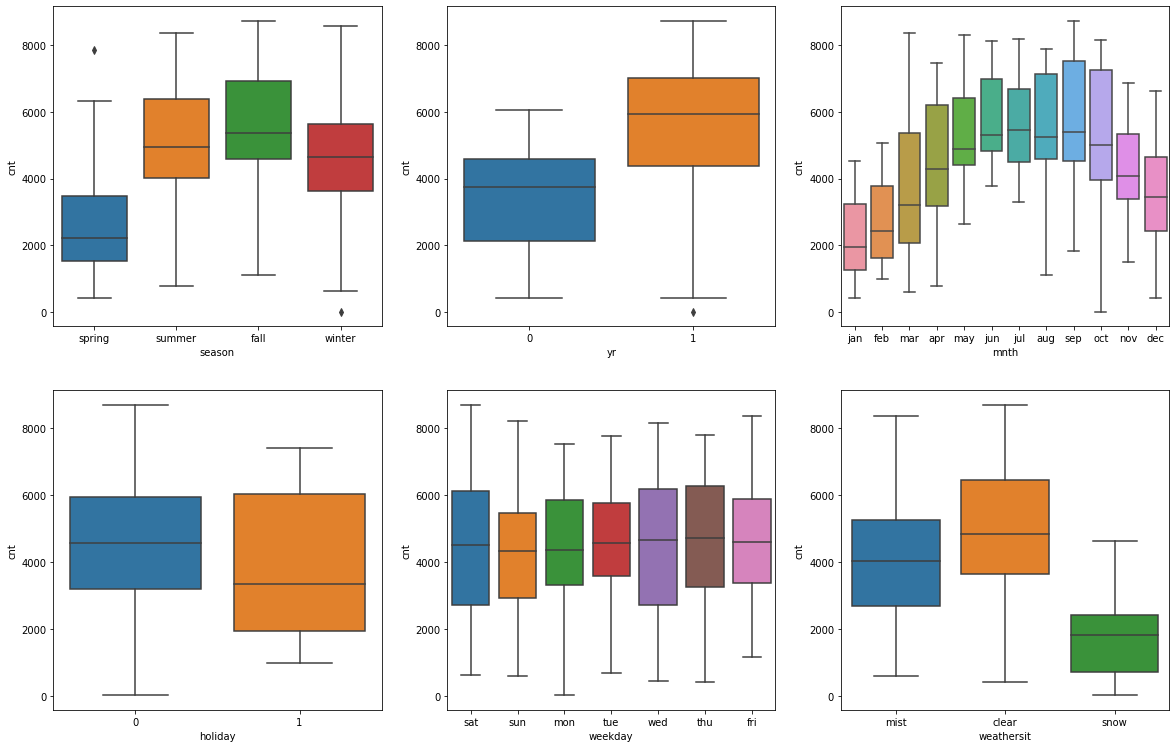

In [22]:
plt.figure(figsize=(20,20))
plt.subplot(331)
sns.boxplot(x='season', y='cnt',data=data_new)
plt.subplot(332)
sns.boxplot(x='yr', y='cnt',data=data_new)
plt.subplot(333)
sns.boxplot(x='mnth', y='cnt',data=data_new)
plt.subplot(334)
sns.boxplot(x='holiday', y='cnt',data=data_new)
plt.subplot(335)
sns.boxplot(x='weekday', y='cnt',data=data_new)
plt.subplot(336)
sns.boxplot(x='weathersit', y='cnt',data=data_new)
plt.show();

1. We can see  there is **increase** in demand in **fall** and **summer** season.
2. We can see a **increase** in demand from month of **may** which is supposed to be a holidays for childrens and teenagers.
3. **week** **day** is **not** **showing** and **inconsistency** over the week.
4. in cnt vs weather situation boxplot we can clearly see a**drop** in demand in the **snow** weather.

###Now we will pair-plot using temp, atemp,	hum,	windspeed,casual,	registered,	cnt.

In [32]:
var = data[['temp', 'atemp',	'hum',	'windspeed','cnt']]

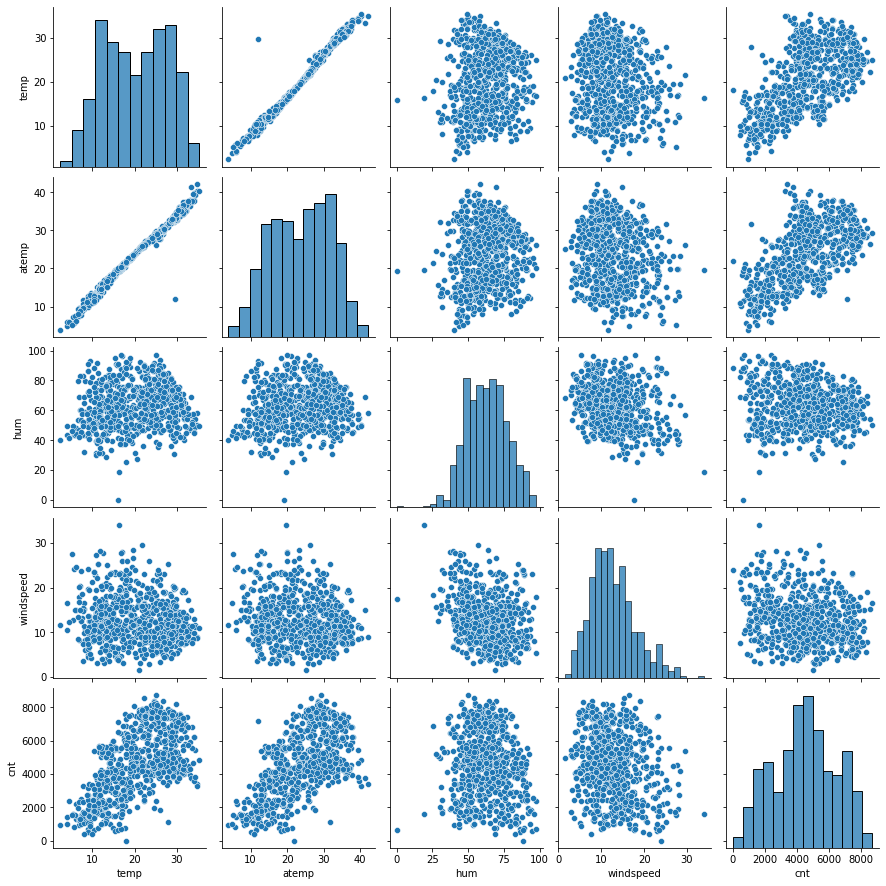

In [ ]:
sns.pairplot(var)

The above Pair-Plot tells us that there is a LINEAR RELATION between 'temp','atemp' and 'cnt'

###Corelation Matrix

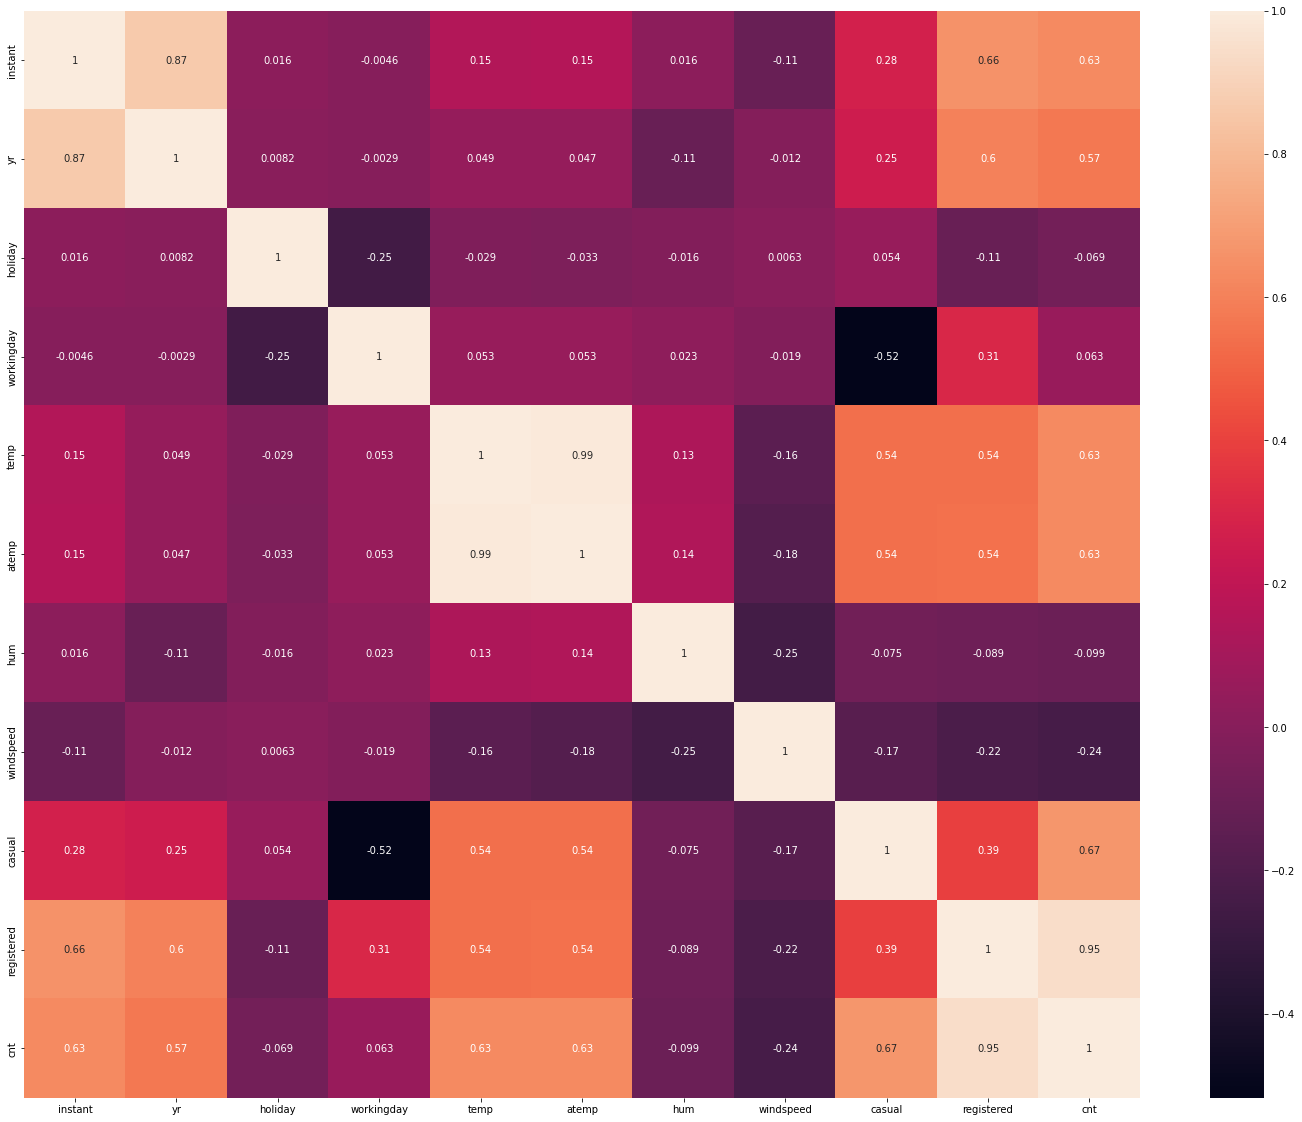

In [33]:
plt.figure(figsize = (25,20))
sns.heatmap(data.corr(), annot = True)

We will refer this map while building the  model so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model.

###Feature Rescaling

In [34]:
scaler = MinMaxScaler()

We will apply this scaler to all the numeric variables in the data_train.

In [35]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
data_train[num_vars] = scaler.fit_transform(data_train[num_vars])


In [36]:
data_train.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_mist,weathersit_snow
337,0,0,0,0.350567,0.361341,0.799484,0.146877,0.398412,0,0,...,0,0,0,0,1,0,0,0,0,0
547,1,0,1,0.932261,0.833624,0.460712,0.412422,0.713875,0,0,...,0,0,1,0,0,0,0,0,0,0
626,1,0,1,0.636576,0.617334,0.553027,0.459915,0.870801,0,0,...,0,1,0,0,0,0,0,1,0,0
309,0,0,0,0.373147,0.379082,0.756977,0.166191,0.417280,0,0,...,0,0,0,0,1,0,0,0,0,0
561,1,0,1,0.908606,0.863180,0.664663,0.338275,0.783249,0,0,...,0,0,1,0,0,0,0,0,0,0


###Model Building

Dividing columns into X and y

In [37]:
y_train = data_train.pop('cnt')
X_train = data_train

In [38]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             
rfe = rfe.fit(X_train, y_train)

In [39]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 15),
 ('season_winter', False, 2),
 ('mnth_aug', False, 16),
 ('mnth_dec', False, 4),
 ('mnth_feb', False, 14),
 ('mnth_jan', False, 6),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 10),
 ('mnth_mar', False, 8),
 ('mnth_may', False, 5),
 ('mnth_nov', False, 3),
 ('mnth_oct', False, 7),
 ('mnth_sep', True, 1),
 ('weekday_mon', False, 9),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 13),
 ('weekday_tue', False, 11),
 ('weekday_wed', False, 12),
 ('weathersit_mist', True, 1),
 ('weathersit_snow', True, 1)]

In [40]:
col = X_train.columns[rfe.support_]
col


Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'mnth_jul', 'mnth_sep', 'weekday_sat', 'weekday_sun',
       'weathersit_mist', 'weathersit_snow'],
      dtype='object')

We will built our model using the varibles we got from RFE

In [41]:
X_train.columns[~rfe.support_]

Index(['season_summer', 'season_winter', 'mnth_aug', 'mnth_dec', 'mnth_feb',
       'mnth_jan', 'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct',
       'weekday_mon', 'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

Creating dataframe from the RFE selected variables.

In [42]:
X_train_rfe = X_train[col]

For creating model first we have to drop some of variables by analysing their p-value and VIF

In [43]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,atemp,52.81
3,temp,52.16
2,workingday,36.69
10,weekday_sat,8.70
11,weekday_sun,8.59
1,holiday,2.53
5,hum,1.89
7,season_spring,1.74
12,weathersit_mist,1.60
13,weathersit_snow,1.32


Now we will add one costant column in the X_train dataframe, and will crearte model.

In [44]:
import statsmodels.api as sm
X_train_lm1 = sm.add_constant(X_train_rfe)

lr1 = sm.OLS(y_train, X_train_lm1).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [45]:
lr1.params


const              0.306113
yr                 0.233148
holiday            0.035802
workingday         0.097519
temp               0.203414
atemp              0.172047
hum               -0.118653
windspeed         -0.148068
season_spring     -0.165370
mnth_jul          -0.064466
mnth_sep           0.071595
weekday_sat        0.114794
weekday_sun        0.057998
weathersit_mist   -0.062885
weathersit_snow   -0.231569
dtype: float64

In [46]:
print(lr1.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     213.1
Date:                Mon, 14 Mar 2022   Prob (F-statistic):          2.31e-193
Time:                        14:28:49   Log-Likelihood:                 523.04
No. Observations:                 510   AIC:                            -1018.
Df Residuals:                     496   BIC:                            -958.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3061      0.023     

from summary and VIF values we can see 'atemp' has high VIF and high p-value. so, we will drop 'atemp' column.

In [47]:
X_train_new = X_train_rfe.drop(["atemp"], axis = 1)

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,36.50
9,weekday_sat,8.65
10,weekday_sun,8.54
1,holiday,2.52
3,temp,2.14
4,hum,1.88
6,season_spring,1.72
11,weathersit_mist,1.60
7,mnth_jul,1.31
12,weathersit_snow,1.31


In [49]:
X_train_lm2 = sm.add_constant(X_train_new)
lr2 = sm.OLS(y_train, X_train_lm2).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [50]:
lr2.params


const              0.308338
yr                 0.233142
holiday            0.035785
workingday         0.098105
temp               0.358491
hum               -0.113960
windspeed         -0.152412
season_spring     -0.166752
mnth_jul          -0.064222
mnth_sep           0.070990
weekday_sat        0.115508
weekday_sun        0.058940
weathersit_mist   -0.063283
weathersit_snow   -0.232664
dtype: float64

In [51]:
print(lr2.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     230.3
Date:                Mon, 14 Mar 2022   Prob (F-statistic):          3.66e-194
Time:                        14:28:58   Log-Likelihood:                 522.11
No. Observations:                 510   AIC:                            -1018.
Df Residuals:                     497   BIC:                            -963.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3083      0.023     

Now we will drop 'hum' column

In [52]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,15.10
8,weekday_sat,3.93
9,weekday_sun,3.77
3,temp,2.09
5,season_spring,1.72
1,holiday,1.59
6,mnth_jul,1.30
7,mnth_sep,1.10
4,windspeed,1.07
11,weathersit_snow,1.06


In [54]:
X_train_lm3 = sm.add_constant(X_train_new)
lr3 = sm.OLS(y_train, X_train_lm3).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [55]:
lr3.params


const              0.252423
yr                 0.235784
holiday            0.020473
workingday         0.085555
temp               0.346684
windspeed         -0.132517
season_spring     -0.165051
mnth_jul          -0.060830
mnth_sep           0.066219
weekday_sat        0.102586
weekday_sun        0.043809
weathersit_mist   -0.082725
weathersit_snow   -0.268329
dtype: float64

In [56]:
print(lr3.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     246.0
Date:                Mon, 14 Mar 2022   Prob (F-statistic):          2.92e-193
Time:                        14:29:08   Log-Likelihood:                 517.12
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     498   BIC:                            -959.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2524      0.015     

'Holiday' has more vif and significantly more p- value.


In [57]:
X_train_new = X_train_new.drop(["holiday"], axis = 1)

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,10.07
1,workingday,9.92
3,windspeed,5.70
7,weekday_sat,2.86
8,weekday_sun,2.76
4,season_spring,2.00
0,yr,1.97
9,weathersit_mist,1.50
5,mnth_jul,1.39
6,mnth_sep,1.21


In [59]:
X_train_lm4 = sm.add_constant(X_train_new)
lr4 = sm.OLS(y_train, X_train_lm4).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [60]:
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     246.0
Date:                Mon, 14 Mar 2022   Prob (F-statistic):          2.92e-193
Time:                        14:29:15   Log-Likelihood:                 517.12
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     498   BIC:                            -959.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2729      0.030     

In [61]:
X_train_new = X_train_new.drop(["workingday"], axis = 1)

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.07
2,windspeed,4.83
0,yr,1.93
3,season_spring,1.65
8,weathersit_mist,1.47
4,mnth_jul,1.36
5,mnth_sep,1.20
6,weekday_sat,1.19
7,weekday_sun,1.19
9,weathersit_snow,1.08


In [63]:
X_train_lm5 = sm.add_constant(X_train_new)
lr5 = sm.OLS(y_train, X_train_lm5).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [64]:
print(lr5.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     266.5
Date:                Mon, 14 Mar 2022   Prob (F-statistic):          6.09e-193
Time:                        14:29:23   Log-Likelihood:                 513.46
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     499   BIC:                            -958.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3360      0.019     

This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. For now, we will consider this as our final model.

##Final Model Interpretation

###Hypothesis Testing:

Hypothesis testing states that:

H0:B1=B2=...=Bn=0
H1: at least one Bi!=0

###IR5 model coeff values:

const 0.3360

yr 0.2363

temp 0.3452

windspeed -0.1312

season_spring -0.1661

mnth_jul -0.0604

weekday_sat 0.0195

weekday_sun 0.0393

weathersit_mist -0.2667

From the lr6 model summary, it is evident that all our coefficients are not equal to zerowhich means We REJECT the NULL HYPOTHESIS

The equation of best fitted surface based on model lr5:
cnt = 0.0336 + yr *0.2363 + temp*0.3452 + windspeed *(-0.1312)+ season_spring *(-0.1661) + mnth_jul* -0.0604 + weekday_sat* 0.195 + weekday_sun *0.0393 + weathersit_mist *-0.2667


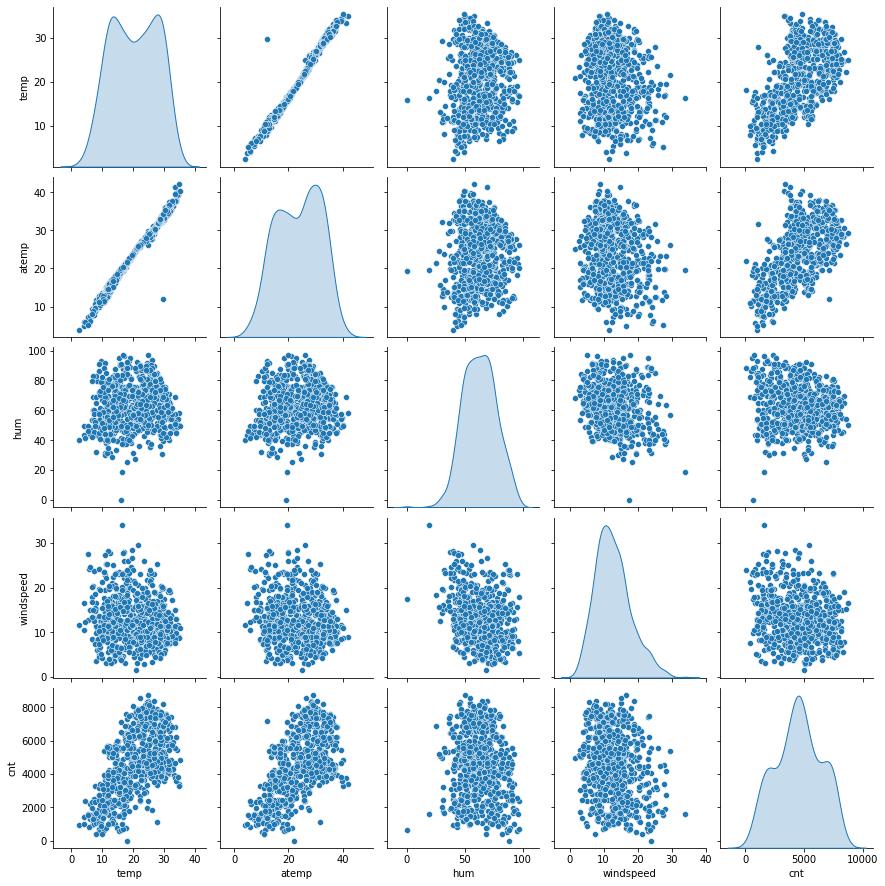

In [65]:
data_new=data_new[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(var, diag_kind='kde')
plt.show()

From this we have seen there is linear relation between temp and atemp variable with the predictor ‘cnt’.

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.07
2,windspeed,4.83
0,yr,1.93
3,season_spring,1.65
8,weathersit_mist,1.47
4,mnth_jul,1.36
5,mnth_sep,1.20
6,weekday_sat,1.19
7,weekday_sun,1.19
9,weathersit_snow,1.08


##MAKING PREDICTION USING FINAL MODEL


In [67]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

data_test[num_vars] = scaler.transform(data_test[num_vars])

In [68]:
data_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_mist,weathersit_snow
146,0,0,1,0.803235,0.746604,0.673679,0.520759,0.535780,0,1,...,0,0,0,0,0,0,0,0,0,0
263,0,0,1,0.691412,0.630888,0.927436,0.176569,0.498159,0,0,...,0,1,0,0,0,0,0,1,1,0
426,1,0,0,0.458090,0.447507,0.640189,0.330861,0.465255,1,0,...,0,0,0,1,0,0,0,0,1,0
552,1,0,0,1.035482,0.971286,0.507084,0.336765,0.554303,0,0,...,0,0,0,1,0,0,0,0,0,0
302,0,0,0,0.335515,0.324179,0.642765,0.367929,0.380695,0,0,...,1,0,0,0,1,0,0,0,0,0


In [69]:
y_test = data_test.pop('cnt')
X_test = data_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 146 to 293
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               219 non-null    int64  
 1   holiday          219 non-null    int64  
 2   workingday       219 non-null    int64  
 3   temp             219 non-null    float64
 4   atemp            219 non-null    float64
 5   hum              219 non-null    float64
 6   windspeed        219 non-null    float64
 7   season_spring    219 non-null    uint8  
 8   season_summer    219 non-null    uint8  
 9   season_winter    219 non-null    uint8  
 10  mnth_aug         219 non-null    uint8  
 11  mnth_dec         219 non-null    uint8  
 12  mnth_feb         219 non-null    uint8  
 13  mnth_jan         219 non-null    uint8  
 14  mnth_jul         219 non-null    uint8  
 15  mnth_jun         219 non-null    uint8  
 16  mnth_mar         219 non-null    uint8  
 17  mnth_may      

In [70]:
col1=X_train_new.columns
X_test=X_test[col1]
X_test_lm5 = sm.add_constant(X_test)
X_test_lm5.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 146 to 293
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   const            219 non-null    float64
 1   yr               219 non-null    int64  
 2   temp             219 non-null    float64
 3   windspeed        219 non-null    float64
 4   season_spring    219 non-null    uint8  
 5   mnth_jul         219 non-null    uint8  
 6   mnth_sep         219 non-null    uint8  
 7   weekday_sat      219 non-null    uint8  
 8   weekday_sun      219 non-null    uint8  
 9   weathersit_mist  219 non-null    uint8  
 10  weathersit_snow  219 non-null    uint8  
dtypes: float64(3), int64(1), uint8(7)
memory usage: 10.1 KB


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [74]:
y_pred = lr5.predict(X_test_lm5)

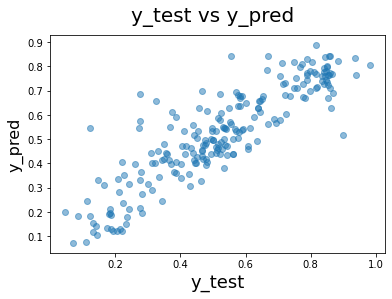

In [75]:
fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=0.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

R^2 value for test

In [76]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7749956673246228

In [77]:
r2=0.8203092200749708

In [78]:
X_test.shape

(219, 10)

In [79]:
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.8116702402708829

##Final Result Comparison

Train R^2 :0.824

1. Train R^2 :0.824
2. Train Adjusted R^2 :0.821
3. Test R^2 :0.820
4. Test Adjusted R^2 :0.812
This seems to be a really good model that can very well 'Generalize' various datasets.






##Final Report

from our overall analysis of final Model, the top 3 predictor variables that affects the bike sharing booking are:







*   Temperature (temp) - A coefficient value of ‘0.5636’ indicated that a unit increase in temp variable increases the bike hire numbers by 0.5636 units.
*   Weather Situation 3 (weathersit_3) - A coefficient value of ‘-0.3070’ indicated that, w.r.t Weathersit1, a unit increase in Weathersit3 variable decreases the bike hire numbers by 0.3070 units.

* Year (yr) - A coefficient value of ‘0.2308’ indicated that a unit increase in yr variable increases the bike hire numbers by 0.2308 units.





